# Hugging Face BPE Tokenizer
https://github.com/huggingface/tokenizers/tree/master/bindings/python

In [3]:
files = ["./data/정치.csv"]
modelname = "bpe_20200317"

## 1) 학습용 파일 읽기

In [2]:
import pandas as pd
contents = []

for file in files :
    df = pd.read_csv(file)
    contents = contents + df["content"].tolist()

len(contents)

20216

## 1) 데이터에서 토크나이저 학습하기

In [6]:
from tokenizers import CharBPETokenizer
tokenizer = CharBPETokenizer()

In [7]:
tokenizer.train(files)
tokenizer.save("./model/", modelname)

['./model/bpe_20200317-vocab.json', './model/bpe_20200317-merges.txt']

In [4]:
from tokenizers import CharBPETokenizer

# Load a BPE Model
vocab = "./model/{}-vocab.json".format(modelname)
merges = "./model/{}-merges.txt".format(modelname)
tokenizer = CharBPETokenizer(vocab, merges)

In [4]:
# Multiprocessing 으로 변경
import re
import numpy as np

def tokenizeBySplit(contents) :
    hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')

    tokenized_text = []
    cnt = 1

    for content in contents :
        try :
            if content == np.nan :
                continue 
                
            text = hangul.sub('', content).replace(" ","")
            tokenized_text = tokenized_text + [w for w in tokenizer.encode(text).tokens if len(w) > 1]

            cnt += 1
            if cnt % 1000 == 0 : 
                print("{} / {}".format(cnt, len(contents)))
        except Exception as e:
            print(str(e))
            print(content)
            
    return tokenized_text

In [5]:
import multiprocessing


chunk_size = int(len(contents)/multiprocessing.cpu_count())
li_split = [contents[i:i + chunk_size] for i in range(0, len(contents), chunk_size)]

pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

ret = pool.map(tokenizeBySplit, li_split)

expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
expected string or bytes-like object
nan
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
expected string or bytes-like object
nan
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string 

In [6]:
tokenized_text = []

for text in ret :
    tokenized_text = tokenized_text + text

In [7]:
import nltk
from nltk import FreqDist
fdist=FreqDist(tokenized_text)

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

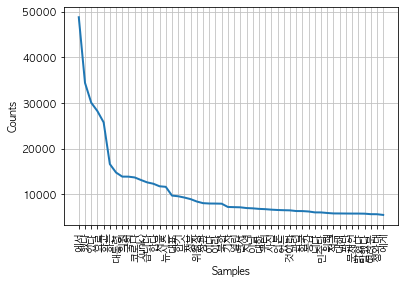

In [9]:
fdist.plot(50)

In [10]:
from konlpy.tag import Mecab
mecab = Mecab()

import pandas as pd

vocab = []

for w in fdist.most_common(10000) :
    pos = mecab.pos(w[0])
    if (pos[0][1][0] == "N") & (len(pos[0][0]) > 1) & (len(pos)>1) & (w[1]>100):
        m = str(pos)
        b = "".join([p[0] for p in pos])
        p = ",".join([p[1] for p in pos])
        f = w[1]
        #print(str(pos) + " " + str(w[1]) + " " + str(b))
        vocab.append((m,p,b,f))

In [11]:
df = pd.DataFrame(vocab, columns=['Mecab', 'PoS', 'BPE', 'Freq'])
df.head(50)

,Mecab,PoS,BPE,Freq
0,"[('사진', 'NNG'), ('영상', 'NNG')]","NNG,NNG",사진영상,5387
1,"[('반영', 'NNG'), ('하', 'XSV'), ('겠', 'EP')]","NNG,XSV,EP",반영하겠,4571
2,"[('코로나바이러스', 'NNP'), ('감염증', 'NNG')]","NNP,NNG",코로나바이러스감염증,3008
3,"[('기자', 'NNG'), ('</', 'SY'), ('w', 'SL'), ('>...","NNG,SY,SL,SY",기자</w>,2401
4,"[('금지', 'NNG'), ('</', 'SY'), ('w', 'SL'), ('>...","NNG,SY,SL,SY",금지</w>,2382
5,"[('가능', 'NNG'), ('성', 'XSN')]","NNG,XSN",가능성,2261
6,"[('예비', 'NNG'), ('후보', 'NNG')]","NNG,NNG",예비후보,2037
7,"[('국민', 'NNG'), ('들', 'XSN')]","NNG,XSN",국민들,1915
8,"[('기자', 'NNG'), ('회견', 'NNG')]","NNG,NNG",기자회견,1878
9,"[('의원', 'NNG'), ('들', 'XSN')]","NNG,XSN",의원들,1695


In [265]:
df.to_csv("./dict.csv")

In [1]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab.pos('자유한국당한국당예비후보때문에가능성국민들미래통합당필리버스터험지출마') # 사전등록후 Mecab

[('자유한국당', 'NNP'),
 ('한국당', 'NNP'),
 ('예비', 'NNG'),
 ('후보', 'NNG'),
 ('때문', 'NNB'),
 ('에', 'JKB'),
 ('가능', 'NNG'),
 ('성', 'XSN'),
 ('국민', 'NNG'),
 ('들', 'XSN'),
 ('미래통합당', 'NNP'),
 ('필리버스터', 'NNP'),
 ('험지출마', 'NNP')]

In [5]:
tokenizer.encode('자유한국당한국당예비후보때문에가능성국민들미래통합당필리버스터험지출마').tokens

['자유한국당',
 '한국당',
 '예비후보',
 '때문',
 '에',
 '가능성',
 '국민들',
 '미래통합당',
 '필리버스터',
 '험지',
 '출마</w>']

In [5]:
mecab.pos('자유한국당')

[('자유한국당', 'NNP')]

In [6]:
mecab.pos('자유 한국당')

[('자유', 'NNG'), ('한국당', 'NNP')]